In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# clone the code and then extrct all the files in the content of the colab
!git clone https://github.com/Aadiv1999/ai-for-av.git temp
!mv temp/* .
!rm -rf temp

In [15]:
# import useful libraries
import os
import numpy as np
import cv2
from src.yolo_utils import *
import matplotlib.pyplot as plt

print("OpenCV version : ", cv2. __version__)
print(cv2.cuda.getCudaEnabledDeviceCount())

OpenCV version :  4.5.5
0


### Load YoloV4 labels

In [16]:
# test our function read_classes
img_file = "./classes/class.names"
classNames = read_classes(img_file)
print("Classes' names :\n", classNames)

Classes' names :
 ['crosswalk', 'speedlimit', 'stop', 'trafficlight']


### YoloV4 weights and cfg files

In this part we'll upload YoloV3 Weights and cfg files in order to input them into cv2.dnn.readNetFromDarknet() and build our forward propagation with OpenCV.

In [17]:
# load the model config and weights
modelConfig_path = "./cfg/yolov4-rds-colab.cfg"
modelWeights_path = "/content/drive/MyDrive/dataset/yolov4-rds_best_2000.weights"

# read the model cfg and weights with the cv2 DNN module
neural_net = cv2.dnn.readNetFromDarknet(modelConfig_path, modelWeights_path)
# set the preferable Backend to GPU
neural_net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
neural_net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [18]:
# defining the input frame resolution for the neural network to process
network = neural_net
height, width = 416,416

# confidence and non-max suppression threshold for this YoloV3 version
confidenceThreshold = 0.5
nmsThreshold = 0.2

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  604 || y :  255 || w :  43 || h : 51 



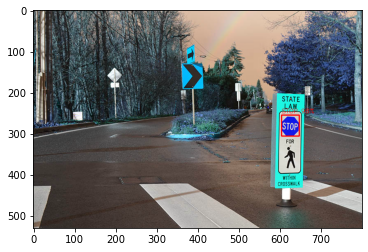

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  229 || y :  101 || w :  108 || h : 165 



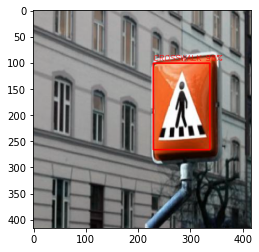

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  115 || y :  128 || w :  98 || h : 134 

Bounding box coordinates in the frame :  x :  239 || y :  66 || w :  75 || h : 266 



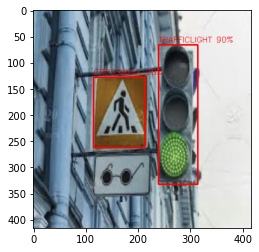

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  89 || y :  71 || w :  200 || h : 206 



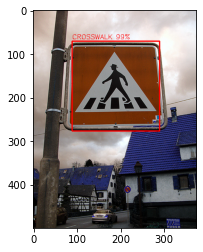

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  100 || y :  42 || w :  186 || h : 200 



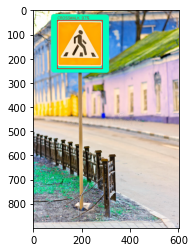

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  201 || y :  94 || w :  168 || h : 161 



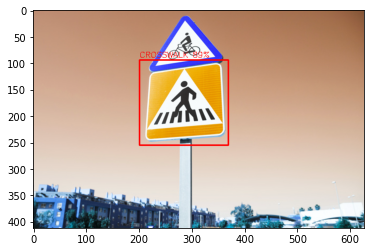

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  279 || y :  92 || w :  44 || h : 58 

Bounding box coordinates in the frame :  x :  369 || y :  37 || w :  23 || h : 56 



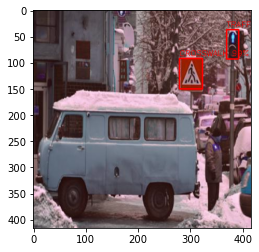

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  416 || y :  33 || w :  201 || h : 254 

Bounding box coordinates in the frame :  x :  164 || y :  233 || w :  145 || h : 181 



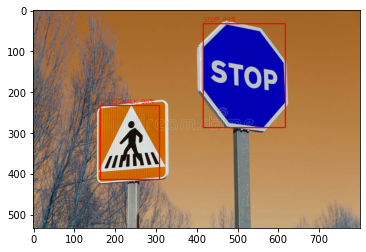

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  59 || y :  36 || w :  185 || h : 222 



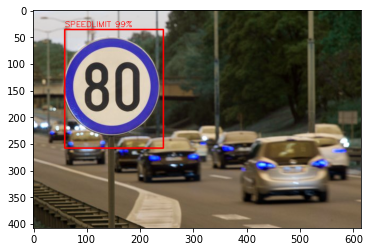

Number of objects detected :  3 

Bounding box coordinates in the frame :  x :  158 || y :  144 || w :  89 || h : 67 

Bounding box coordinates in the frame :  x :  18 || y :  279 || w :  36 || h : 28 

Bounding box coordinates in the frame :  x :  0 || y :  347 || w :  47 || h : 36 



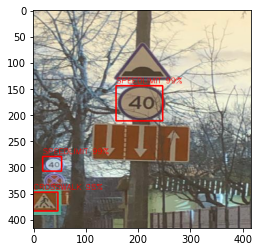

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  470 || y :  -1 || w :  315 || h : 293 



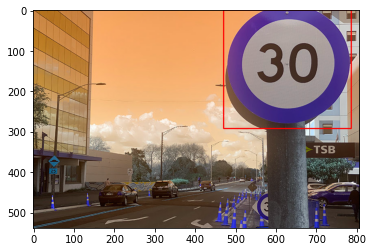

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  496 || y :  346 || w :  361 || h : 327 

Bounding box coordinates in the frame :  x :  404 || y :  616 || w :  658 || h : 608 



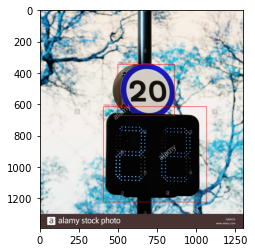

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  276 || y :  103 || w :  57 || h : 38 

Bounding box coordinates in the frame :  x :  280 || y :  145 || w :  56 || h : 40 



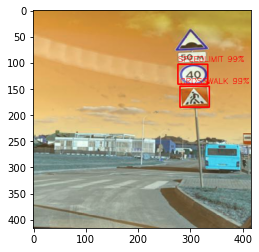

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  133 || y :  48 || w :  149 || h : 118 



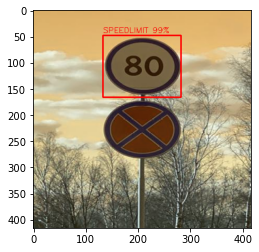

Number of objects detected :  3 

Bounding box coordinates in the frame :  x :  244 || y :  204 || w :  39 || h : 30 

Bounding box coordinates in the frame :  x :  107 || y :  221 || w :  27 || h : 23 

Bounding box coordinates in the frame :  x :  158 || y :  197 || w :  32 || h : 23 



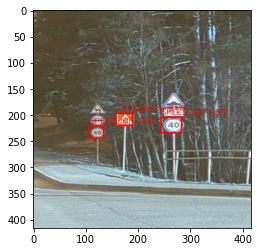

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  157 || y :  125 || w :  79 || h : 58 

Bounding box coordinates in the frame :  x :  151 || y :  219 || w :  87 || h : 61 



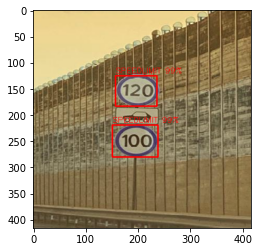

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  97 || y :  171 || w :  49 || h : 39 



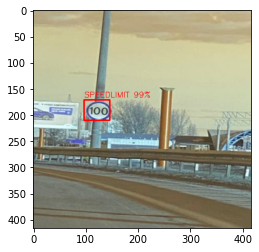

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  232 || y :  194 || w :  55 || h : 39 



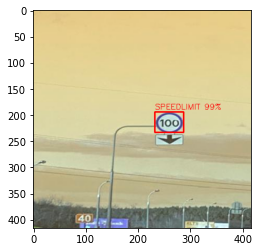

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  300 || y :  144 || w :  119 || h : 120 



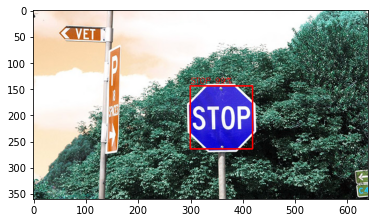

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  130 || y :  62 || w :  85 || h : 87 



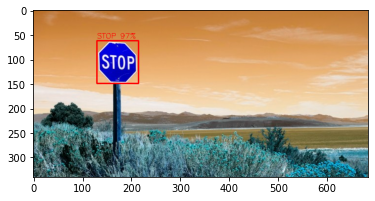

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  822 || y :  97 || w :  171 || h : 154 

Bounding box coordinates in the frame :  x :  844 || y :  317 || w :  103 || h : 102 



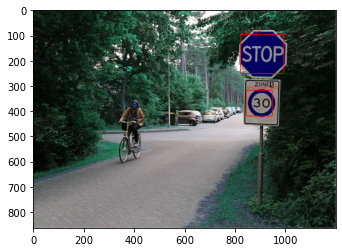

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  307 || y :  0 || w :  110 || h : 137 



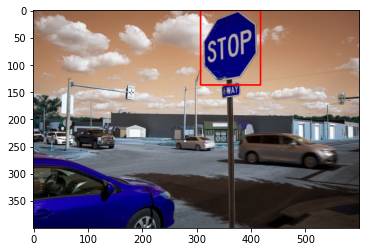

Number of objects detected :  6 

Bounding box coordinates in the frame :  x :  172 || y :  105 || w :  72 || h : 53 

Bounding box coordinates in the frame :  x :  243 || y :  185 || w :  52 || h : 52 

Bounding box coordinates in the frame :  x :  207 || y :  181 || w :  42 || h : 91 

Bounding box coordinates in the frame :  x :  164 || y :  212 || w :  30 || h : 65 

Bounding box coordinates in the frame :  x :  6 || y :  345 || w :  25 || h : 31 

Bounding box coordinates in the frame :  x :  124 || y :  351 || w :  14 || h : 16 



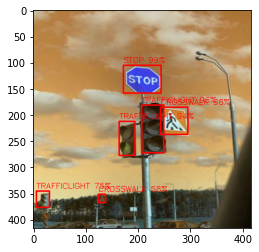

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  685 || y :  437 || w :  37 || h : 43 



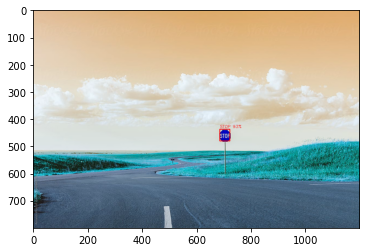

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  617 || y :  184 || w :  37 || h : 44 



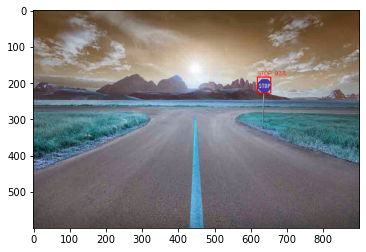

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  565 || y :  116 || w :  62 || h : 71 



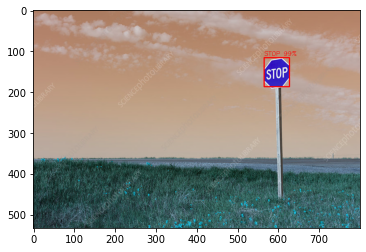

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  463 || y :  29 || w :  200 || h : 240 



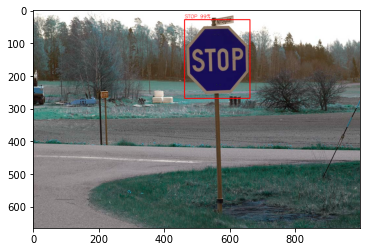

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  370 || y :  78 || w :  67 || h : 73 

Bounding box coordinates in the frame :  x :  108 || y :  35 || w :  82 || h : 114 



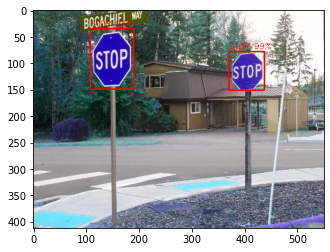

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  223 || y :  122 || w :  226 || h : 236 



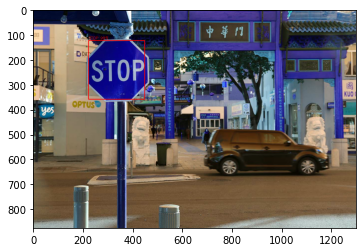

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  682 || y :  102 || w :  192 || h : 183 



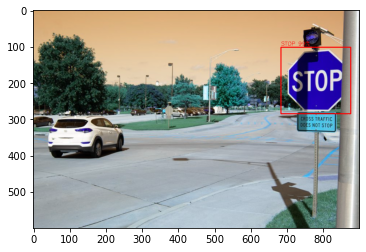

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  554 || y :  78 || w :  234 || h : 212 



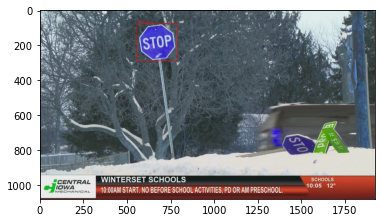

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  506 || y :  5 || w :  202 || h : 579 



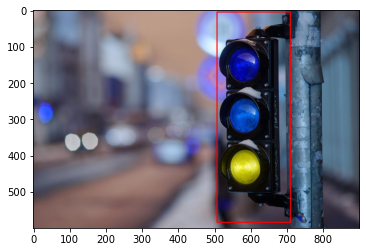

Number of objects detected :  2 

Bounding box coordinates in the frame :  x :  279 || y :  192 || w :  59 || h : 108 

Bounding box coordinates in the frame :  x :  205 || y :  200 || w :  80 || h : 96 



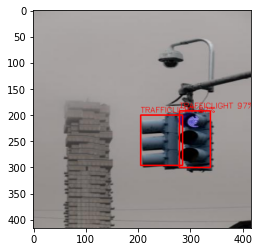

Number of objects detected :  5 

Bounding box coordinates in the frame :  x :  55 || y :  578 || w :  135 || h : 346 

Bounding box coordinates in the frame :  x :  2149 || y :  316 || w :  100 || h : 335 

Bounding box coordinates in the frame :  x :  2782 || y :  419 || w :  112 || h : 187 

Bounding box coordinates in the frame :  x :  4195 || y :  940 || w :  101 || h : 153 

Bounding box coordinates in the frame :  x :  46 || y :  994 || w :  105 || h : 97 



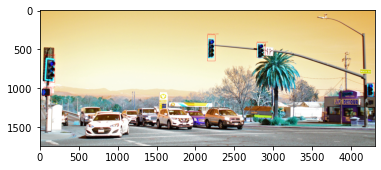

Number of objects detected :  4 

Bounding box coordinates in the frame :  x :  883 || y :  1025 || w :  149 || h : 277 

Bounding box coordinates in the frame :  x :  429 || y :  134 || w :  242 || h : 492 

Bounding box coordinates in the frame :  x :  1818 || y :  924 || w :  120 || h : 271 

Bounding box coordinates in the frame :  x :  1506 || y :  101 || w :  184 || h : 526 



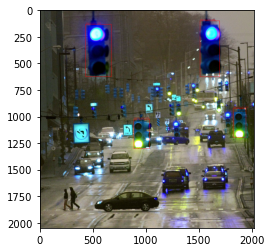

Number of objects detected :  5 

Bounding box coordinates in the frame :  x :  208 || y :  37 || w :  19 || h : 45 

Bounding box coordinates in the frame :  x :  186 || y :  51 || w :  9 || h : 22 

Bounding box coordinates in the frame :  x :  133 || y :  51 || w :  8 || h : 18 

Bounding box coordinates in the frame :  x :  18 || y :  78 || w :  9 || h : 21 

Bounding box coordinates in the frame :  x :  84 || y :  72 || w :  10 || h : 11 



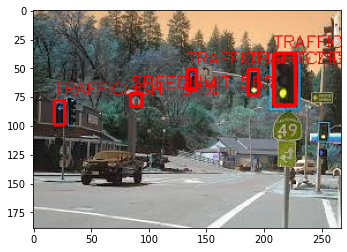

Number of objects detected :  4 

Bounding box coordinates in the frame :  x :  630 || y :  280 || w :  47 || h : 118 

Bounding box coordinates in the frame :  x :  1089 || y :  338 || w :  44 || h : 140 

Bounding box coordinates in the frame :  x :  1028 || y :  464 || w :  47 || h : 101 

Bounding box coordinates in the frame :  x :  1100 || y :  461 || w :  42 || h : 47 



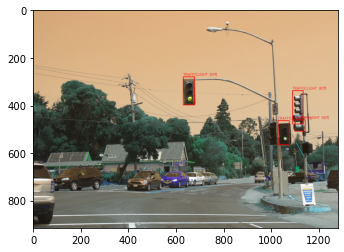

Number of objects detected :  6 

Bounding box coordinates in the frame :  x :  153 || y :  77 || w :  24 || h : 50 

Bounding box coordinates in the frame :  x :  311 || y :  62 || w :  26 || h : 68 

Bounding box coordinates in the frame :  x :  216 || y :  75 || w :  22 || h : 57 

Bounding box coordinates in the frame :  x :  91 || y :  76 || w :  25 || h : 51 

Bounding box coordinates in the frame :  x :  423 || y :  174 || w :  18 || h : 33 

Bounding box coordinates in the frame :  x :  93 || y :  162 || w :  15 || h : 41 



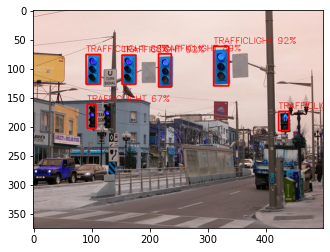

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  78 || y :  135 || w :  115 || h : 61 



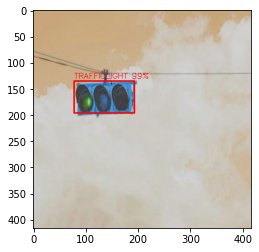

In [23]:
image_dir = "/content/drive/MyDrive/dataset/full_scene"

images = os.listdir(image_dir)
images.sort()

for img_path in images:
    img_name = os.path.join(image_dir, img_path)
    # # load the image
    img = load_image(image_path=img_name)

    # using convert_to_blob function :
    outputs = convert_to_blob(img, network, height, width)
    # apply object detection on the video file
    bounding_boxes, class_objects, confidence_probs = object_detection(
        outputs, img, confidenceThreshold)
    # perform non-max suppression
    indices = nms_bbox(bounding_boxes, confidence_probs,
                    confidenceThreshold, nmsThreshold)
    # draw the boxes
    box_drawing(img, indices, bounding_boxes, class_objects,
                confidence_probs, classNames, color=(255, 0, 0), thickness=2)

    # to save the detected image
    # img_save = cv2.imwrite(ENTER_SAVE_DIR, img)

    # display the image
    plt.imshow(img, cmap='gray')
    plt.show()
